In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from lineartree import LinearTreeRegressor

In [210]:
def get_rmse(preds, actual):
    return np.sqrt(np.mean((preds - actual)**2))

In [211]:
f1 = lambda x: 20*x + 3
f2 = lambda x: 35*x - 17
f3 = lambda x: -21*x - 18
f4 = lambda x: -10*x - 4.7

X = np.random.normal(0,1,1000).reshape((-1, 1))
y = np.zeros(X.shape[0])
y[X[:,0] < -0.5] = f1(X[:,0][X[:,0] < -0.5])
y[abs(X[:,0]) <= 0.5] = f2(X[:,0][abs(X[:,0]) <= 0.5])
y[X[:,0] > 0.5] = f3(X[:,0][X[:,0] > 0.5])
y[X[:,0] > 1] = f4(X[:,0][X[:,0] > 1])
y += np.random.normal(0, 1, y.shape[0])

X_train = X[:900]
y_train = y[:900]

X_test = X[900:]
y_test = y[900:]

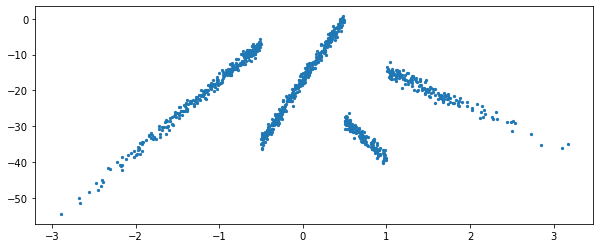

In [212]:
plt.figure(figsize=(10,4))
plt.scatter(X[:,0], y, s=5)

# Control 1 : Linear Regression

Text(0.5, 1.0, 'RMSE=10.18')

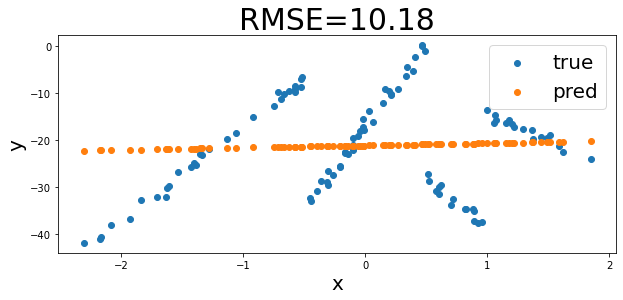

In [213]:
control1 = LinearRegression()
control1.fit(X_train, y_train)
pred = control1.predict(X_test)

plt.figure(figsize=(10,4))
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], pred)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend(['true', 'pred'], fontsize=20)
rmse = round(get_rmse(pred, y_test), 2)
plt.title(f'RMSE={rmse}', fontsize=30)

# Control 2 : Decision Tree

Text(0.5, 1.0, 'RMSE=7.35')

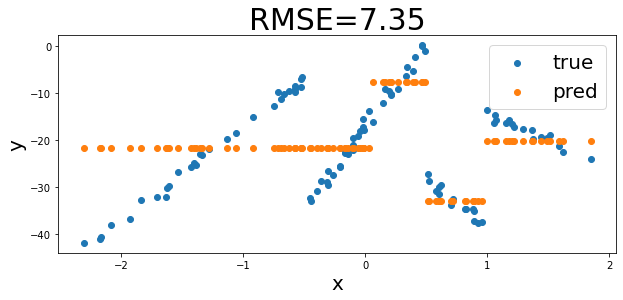

In [214]:
control2 = DecisionTreeRegressor(max_depth=2)
control2.fit(X_train, y_train)
pred = control2.predict(X_test)

plt.figure(figsize=(10,4))
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], pred)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend(['true', 'pred'], fontsize=20)
rmse = round(get_rmse(pred, y_test), 2)
plt.title(f'RMSE={rmse}', fontsize=30)

# Variant : Linear Tree Regressor

Text(0.5, 1.0, 'RMSE=4.6')

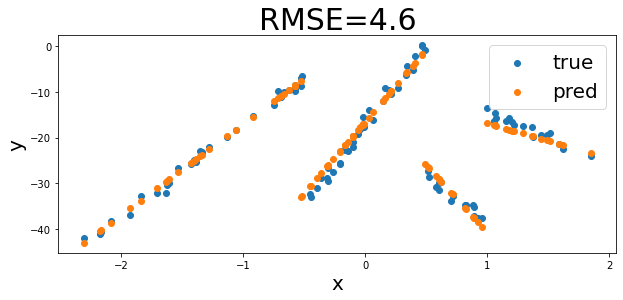

In [215]:
variant = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=2)
variant.fit(X_train, y_train)
pred = variant.predict(X_test)

plt.figure(figsize=(10,4))
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], pred)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend(['true', 'pred'], fontsize=20)
rmse = round(get_rmse(pred, y_test), 2)
plt.title(f'RMSE={rmse}', fontsize=30)